<h1>Statistical Analysis Of NYC Yellow Taxi Trip Data to Optimize Fare Structures and Payment Methods</h1>

<h1>Data Cleaning and Preprocessing</h1>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Load the dataset
taxi_data = pd.read_csv("2017_Yellow_Taxi_Trip_Data.csv", index_col=0)

# Display the first few rows of the dataset
taxi_data.head()



,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56
35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80
106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75
38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69
30841670,2,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80


In [14]:
# Drop rows with any missing values
taxi_data_cleaned = taxi_data.dropna()

# Convert datetime columns to datetime format
taxi_data_cleaned['tpep_pickup_datetime'] = pd.to_datetime(taxi_data_cleaned['tpep_pickup_datetime'])
taxi_data_cleaned['tpep_dropoff_datetime'] = pd.to_datetime(taxi_data_cleaned['tpep_dropoff_datetime'])

# Verify data types and check for any remaining missing values
print(taxi_data_cleaned.dtypes)
print(taxi_data_cleaned.isnull().sum())


VendorID                          int64
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                   int64
trip_distance                   float64
RatecodeID                        int64
store_and_fwd_flag               object
PULocationID                      int64
DOLocationID                      int64
payment_type                      int64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
dtype: object
VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra    

<h1>Descriptive Statistics</h1>

In [16]:
# Display descriptive statistics for fare amounts
fare_description = taxi_data_cleaned['fare_amount'].describe()
print(fare_description)


count    22699.000000
mean        13.026629
std         13.243791
min       -120.000000
25%          6.500000
50%          9.500000
75%         14.500000
max        999.990000
Name: fare_amount, dtype: float64


In [18]:
# Count the occurrences of each payment type
payment_type_counts = taxi_data_cleaned['payment_type'].value_counts()
print(payment_type_counts)


payment_type
1    15265
2     7267
3      121
4       46
Name: count, dtype: int64


<h1>Visualizations</h1>

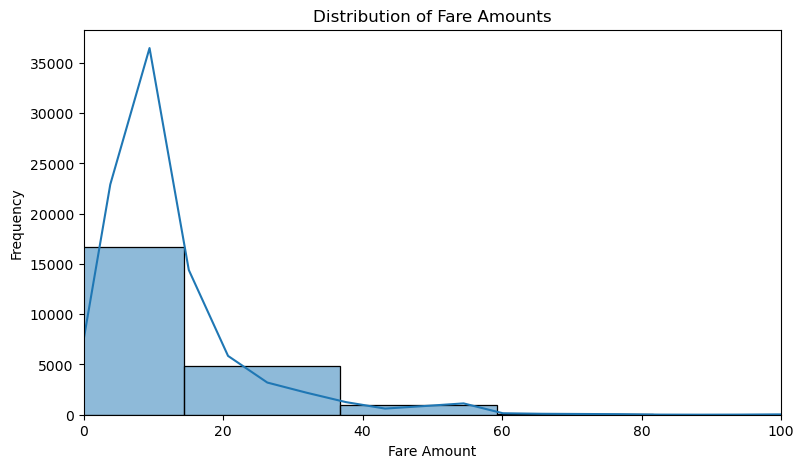

In [49]:
# Plot the distribution of fare amounts
plt.figure(figsize=(9, 5))
sns.histplot(taxi_data_cleaned['fare_amount'], bins=50, kde=True)
plt.title('Distribution of Fare Amounts')
plt.xlabel('Fare Amount')
plt.ylabel('Frequency')
plt.xlim(0, 100)  # Limit the x-axis to exclude extreme outliers for better visualization
plt.show()


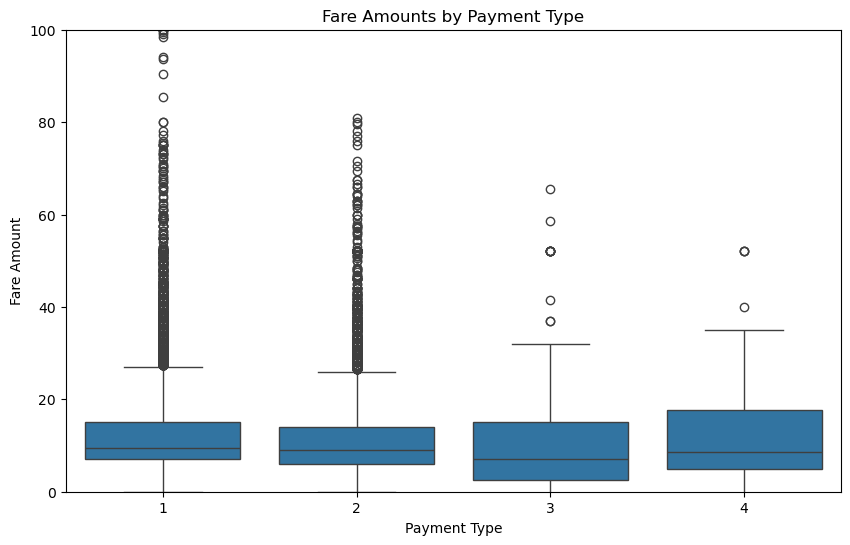

In [22]:
# Plot fare amounts by payment type
plt.figure(figsize=(10, 6))
sns.boxplot(x='payment_type', y='fare_amount', data=taxi_data_cleaned)
plt.title('Fare Amounts by Payment Type')
plt.xlabel('Payment Type')
plt.ylabel('Fare Amount')
plt.ylim(0, 100)  # Limit the y-axis to exclude extreme outliers for better visualization
plt.show()


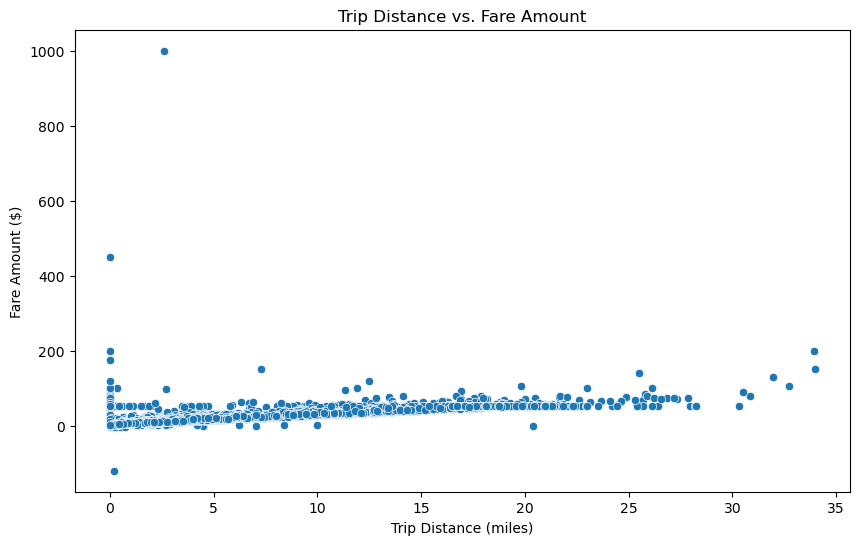

In [28]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='trip_distance', y='fare_amount', data=taxi_data_cleaned)
plt.title('Trip Distance vs. Fare Amount')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Fare Amount ($)')
plt.show()


Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'trip_duration'],
      dtype='object')


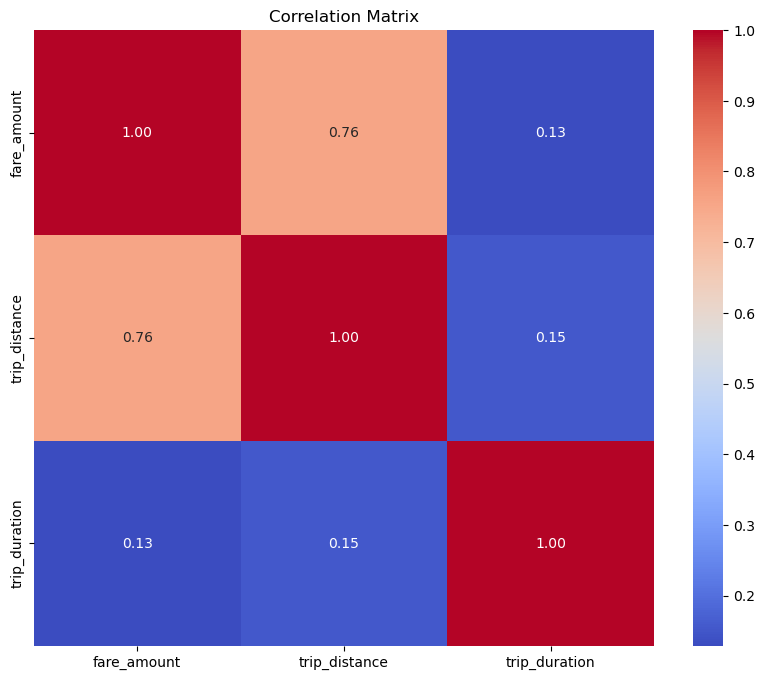

In [32]:
# Assuming taxi_data_cleaned is your cleaned DataFrame

# Calculate trip duration if not already done
if 'trip_duration' not in taxi_data_cleaned.columns:
    taxi_data_cleaned['trip_duration'] = (taxi_data_cleaned['tpep_dropoff_datetime'] - taxi_data_cleaned['tpep_pickup_datetime']).dt.total_seconds() / 60

# Verify columns
print(taxi_data_cleaned.columns)

# Create correlation matrix
correlation_matrix = taxi_data_cleaned[['fare_amount', 'trip_distance', 'trip_duration']].corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


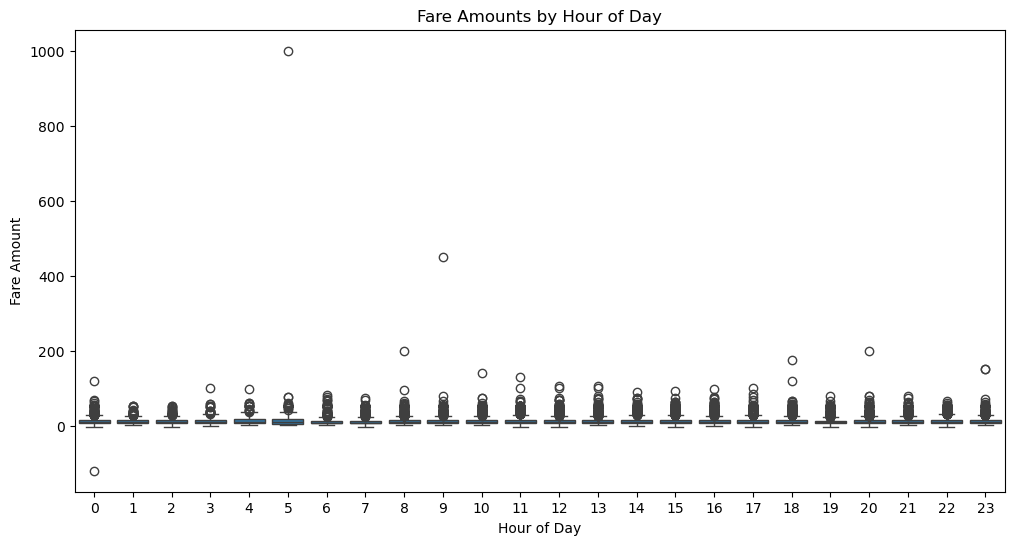

In [34]:
taxi_data_cleaned['pickup_hour'] = taxi_data_cleaned['tpep_pickup_datetime'].dt.hour
plt.figure(figsize=(12, 6))
sns.boxplot(x='pickup_hour', y='fare_amount', data=taxi_data_cleaned)
plt.title('Fare Amounts by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Fare Amount')
plt.show()


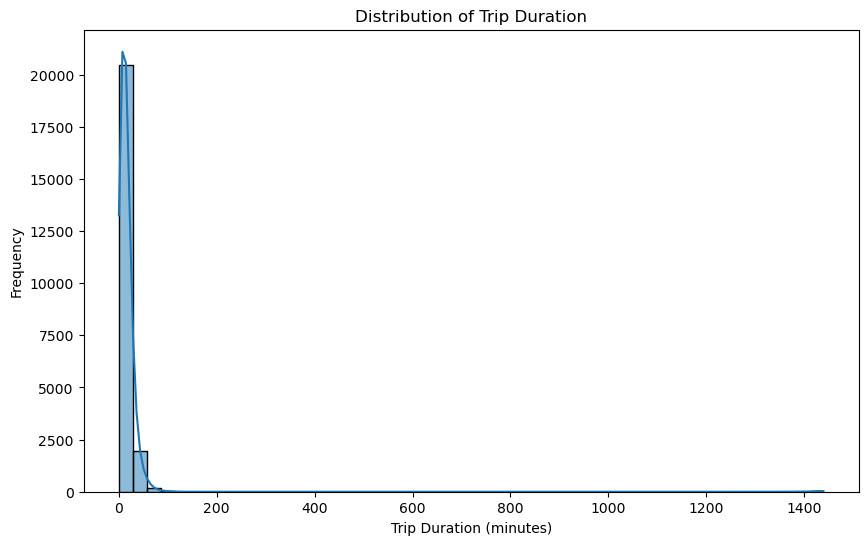

In [36]:
taxi_data_cleaned['trip_duration'] = (taxi_data_cleaned['tpep_dropoff_datetime'] - taxi_data_cleaned['tpep_pickup_datetime']).dt.seconds / 60
plt.figure(figsize=(10, 6))
sns.histplot(taxi_data_cleaned['trip_duration'], bins=50, kde=True)
plt.title('Distribution of Trip Duration')
plt.xlabel('Trip Duration (minutes)')
plt.ylabel('Frequency')
plt.show()


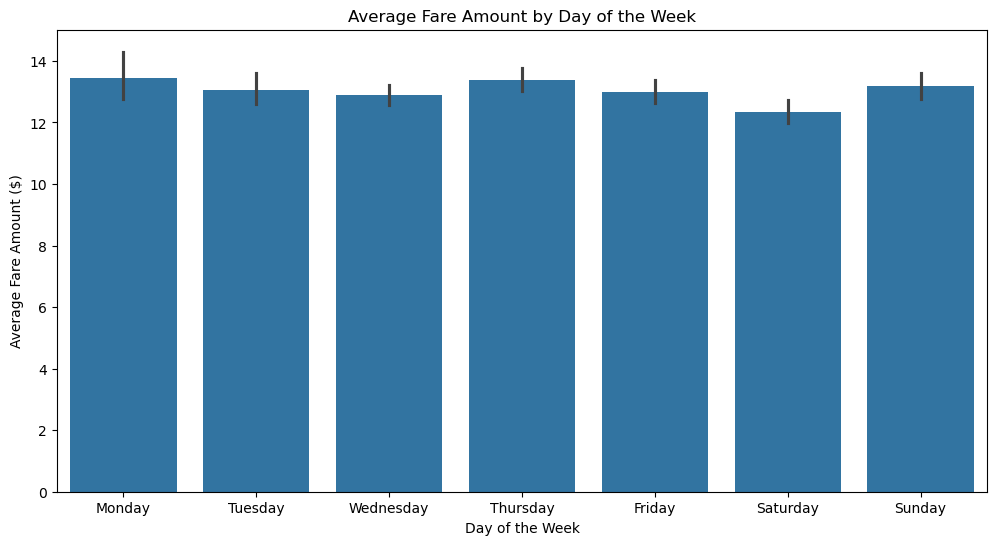

In [38]:
taxi_data_cleaned['pickup_day'] = taxi_data_cleaned['tpep_pickup_datetime'].dt.day_name()
plt.figure(figsize=(12, 6))
sns.barplot(x='pickup_day', y='fare_amount', data=taxi_data_cleaned, estimator=np.mean, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Average Fare Amount by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Fare Amount ($)')
plt.show()


<h1>Normality Tests</h1>

In [24]:
# Separate fares by payment type
credit_card_fares = taxi_data_cleaned[taxi_data_cleaned['payment_type'] == 1]['fare_amount']
cash_fares = taxi_data_cleaned[taxi_data_cleaned['payment_type'] == 2]['fare_amount']

# Shapiro-Wilk test for normality
credit_card_sample = credit_card_fares.sample(5000, random_state=1)
cash_sample = cash_fares.sample(5000, random_state=1)

credit_card_normality = stats.shapiro(credit_card_sample)
cash_normality = stats.shapiro(cash_sample)

print("Credit Card Fares Normality Test:", credit_card_normality)
print("Cash Fares Normality Test:", cash_normality)


Credit Card Fares Normality Test: ShapiroResult(statistic=0.30415141582489014, pvalue=0.0)
Cash Fares Normality Test: ShapiroResult(statistic=0.5440779328346252, pvalue=0.0)


<h1>T-Test for Independent Samples</h1>

In [26]:
# Perform t-test for independent samples
t_stat, p_value = stats.ttest_ind(credit_card_fares, cash_fares, equal_var=False)

# Display results
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Interpret results
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a statistically significant difference in fare amounts between credit card and cash payments.")
else:
    print("Fail to reject the null hypothesis: There is no statistically significant difference in fare amounts between credit card and cash payments.")


T-statistic: 6.866800855655372
P-value: 6.797387473030518e-12
Reject the null hypothesis: There is a statistically significant difference in fare amounts between credit card and cash payments.
